In [202]:
# import all packages 
import numpy as np
import pandas as pd
import wooldridge as woo
import statsmodels.formula.api as smf 
import patsy as pt
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.base.model as smclass
import linearmodels.iv as iv
import linearmodels as plm
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.api import VAR

In [6]:
# question 1

In [7]:
# 1a
# The endogenous variables in the model are the quantity of Norwegian strawberries demanded, 
# the price of Norwegian strawberries, the quantity of Norwegian strawberries supplied, 
# and  are all endogenous because they are all affected by the other variables present in 
# the model. For example, the price of Norweigan strawberries demanded would absolutely 
# alter the the quantity of Norweigan strawberries demanded. 
# The exogenous variables in the model are the price of German strawberries, consumer income, 
# fertilizer price, the quantity of Norwegian strawberries supplied last period, and farm wage 
# rate because none of them are affected by other variables present in the model. For example, 
# the quantity of Norwegian strawberries supplied last period could not possible by altered
# by the the quantity of Norwegian strawberries supplied currently because time travel isn't 
# possible, so variables from the future cannot affect those in the past. 

In [ ]:
# 1b
# By checking the econometric identification of parameters for each equation, once can see the
# order and rank conditions are met because both equations have variables the other does not. 
# For example, consumer income is only present in demand, not supply while fertilizer price is 
# only present in supply, not demand. The order condition is important for estimation to ensure 
# variables are over accounted for in the structural model. The rank condition is important for
# estimation because the variable missing in one equation must still be accounted for in the other. 
# If either of these conditions are not met, the model could have biased or unstable estimators. 

In [ ]:
# 1c
# To obtain 2SLS estimates for the demand equation using only OLS estimation, I would begin by 
# regessing the price of Norweigan strawberries on the exogenous variables, i.e. the price of 
# German strawberries, consumer income, fertilizer price, the quantity of Norwegian strawberries
# supplied last period, and farm wage rate. Then I would use this estimation of price to estimate
# the quantity demanded of Norweigan strawberries. 

In [ ]:
# 1d
# An F test can be used to determine if the instrumental variables used in the 2SLS estimation are 
# useful by determining whether or not the instruments are weak. I would test the exogenous variables 
# including the price of German strawberries, consumer income, fertilizer price, the quantity of 
# Norwegian strawberries supplied last period, and farm wage rate. If the F statistics for these 
# exogenous variables are over 10, then I don't need to worry about weak instruments, and they are
# useful. If after performing this test you concluded that the instrumental variables are weak this 
# would cause problems such as the first estimated equation using the exogoneous variables having
# low explanatory power, which will in turn cause this same issue in the final estimated equation of
# the demand of Norweigan strawberries. 

In [ ]:
# 1e
# When the number of observations used in estimation rises, I would expect the estimates of unknown 
# model parameters to improve because as more data is available, the results will become more 
# thorough. More specifically, as the size of n increases, the estimates of the parameters get 
# closer to the actual affect. For example, if my equation is trying to estimate the average 
# affect consumer has on the demand of Norweigan strawberries, the more price and quantity demanded
# observations I have access to, the more accurate the representation of one's influence on the other
# will be. 

In [24]:
# 1f
c = woo.dataWoo('CARD')
reduced_reg = smf.ols(formula='educ ~ nearc4 + exper + expersq + black + smsa + south + smsa66 + \
                            reg662 + reg663 + reg664 + reg665 + reg666 + reg667 + reg668 + \
                            reg669', data=c)
reduced_reg = reduced_reg.fit()
c['resid'] = reduced_reg.resid
reduced_stage2 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq + black + smsa + south + \
                                  smsa66 + reg662 + reg663 + reg664 + reg665 + reg666 + reg667 + \
                                  reg668 + reg669 + resid', data=c)
reduced_stage2 = reduced_stage2.fit()
table_stage2 = pd.DataFrame({'b': round(reduced_stage2.params, 4),
                             'se': round(reduced_stage2.bse, 4),
                             't': round(reduced_stage2.tvalues, 4),
                             'pval': round(reduced_stage2.pvalues, 4)})
print(f'table_stage2: \n{table_stage2}\n')
# c5 (i) 
# The p-values of the reduced form residuals is 0.28, meaning our results are not significant 
# and x in exogenous. Therfore, the difference between OLS and IV is not statistically significant. 

table_stage2: 
                b      se       t    pval
Intercept  3.6662  0.8866  4.1352  0.0000
educ       0.1315  0.0527  2.4958  0.0126
exper      0.1083  0.0227  4.7738  0.0000
expersq   -0.0023  0.0003 -7.3034  0.0000
black     -0.1468  0.0517 -2.8406  0.0045
smsa       0.1118  0.0304  3.6837  0.0002
south     -0.1447  0.0262 -5.5311  0.0000
smsa66     0.0185  0.0207  0.8946  0.3711
reg662     0.1008  0.0361  2.7893  0.0053
reg663     0.1483  0.0353  4.2010  0.0000
reg664     0.0499  0.0419  1.1900  0.2341
reg665     0.1463  0.0451  3.2420  0.0012
reg666     0.1629  0.0498  3.2736  0.0011
reg667     0.1346  0.0474  2.8415  0.0045
reg668    -0.0831  0.0569 -1.4606  0.1442
reg669     0.1078  0.0401  2.6897  0.0072
resid     -0.0571  0.0528 -1.0806  0.2800

iv_results: 
                          IV-2SLS Estimation Summary                          
Dep. Variable:           np.log(wage)   R-squared:                      0.1702
Estimator:                    IV-2SLS   Adj. R-squared:  

In [ ]:
# 1g
iv_reg = iv.IV2SLS.from_formula(formula='np.log(wage) ~ 1 + [educ ~ nearc2 + nearc4] + exper + \
                                         expersq + black + smsa + south + smsa66 + reg662 + \
                                         reg663 + reg664 + reg665 + reg666 + reg667 + reg668 \
                                         + reg669', data=c)
iv_results = iv_reg.fit(cov_type='unadjusted', debiased=True)
print(f'iv_results: \n{iv_results}\n')
# c5 (ii) 
# The coefficient on educ change slightly from 0.1315 to 0.1571. 

In [ ]:
# 1h
c['iv_resid'] = iv_results.resids
aux_reg = smf.ols(formula='iv_resid ~ nearc2 + nearc4 + exper + expersq + black + smsa + south \
                           + smsa66 + reg662 + reg663 + reg664 + reg665 + reg666 + reg667 + \
                           reg668 + reg669', data=c)
aux_results = aux_reg.fit()
r2 = aux_results.rsquared 
n = aux_results.nobs
teststat = n * r2
pval = 1 - stats.chi2.cdf(teststat, 1)
print(f'r2: {r2}\n')
print(f'n: {n}\n')
print(f'teststate: {teststat}\n')
print(f'pval: {pval}\n')
# c5 (iii)
# Given that the p-value is 0.26, we fail to reject exogeneity of the instruments. 

In [2]:
# question 2

In [37]:
# 2a
w = woo.dataWoo('WAGEPAN')
w = w.set_index(['nr', 'year'], drop=False)

pooled_reg = plm.PooledOLS.from_formula(
    formula='lwage ~ 1 + d81 + d82 + d83 + d84 + d85 + d86 + d87', data=w)
pooled_results = pooled_reg.fit()
print(pooled_results)

re_reg = plm.RandomEffects.from_formula(
    formula='lwage ~ 1 + d81 + d82 + d83 + d84 + d85 + d86 + d87', data=w)
re_results = re_reg.fit()
print(re_results)

fe_reg = plm.PanelOLS.from_formula(
    formula='lwage ~ 1 + C(year)', data=w)
fe_results = fe_reg.fit()
print(fe_results) 

w_diff = w.set_index(['nr', 'year'])
reg_plm = plm.FirstDifferenceOLS.from_formula(formula='lwage ~ d81 + d82 + d83 + d84 + d85 \
                                                       + d86 + d87', data=w)
results_plm = reg_plm.fit()
print(results_plm) 

# c16 (i) 
# The coefficients on the year dummies are all exactly the same throughout the 
# four kinds of models. 

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.0752
Estimator:                  PooledOLS   R-squared (Between):              0.0000
No. Observations:                4360   R-squared (Within):               0.1625
Date:                Sat, Apr 23 2022   R-squared (Overall):              0.0752
Time:                        15:53:49   Log-likelihood                   -3269.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      50.543
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(7,4352)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             50.543
                            

In [71]:
# 2b
w = woo.dataWoo('WAGEPAN')
w = w.set_index(['nr', 'year'], drop=False)
pooled_reg = plm.PooledOLS.from_formula(
    formula='lwage ~ 1 + d81 + d82 + d83 + d84 + d85 + d86 + d87 + educ + black + hisp', data=w)
pooled_results = pooled_reg.fit()
print(pooled_results)

re_reg = plm.RandomEffects.from_formula(
    formula='lwage ~ 1 + d81 + d82 + d83 + d84 + d85 + d86 + d87 + educ + black + hisp', data=w)
re_results = re_reg.fit()
print(re_results)

fe_reg = plm.PanelOLS.from_formula(
    formula='lwage ~ 1 + C(year) + educ + black + hisp', data=w)
fe_results = fe_reg.fit()
print(fe_results) 

# c16 (ii) 
# Once again, all the coefficients are exactly the same across the OLS, random effects, 
# and fixed effects model.

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.1448
Estimator:                  PooledOLS   R-squared (Between):              0.1296
No. Observations:                4360   R-squared (Within):               0.1625
Date:                Sat, Apr 23 2022   R-squared (Overall):              0.1448
Time:                        17:23:02   Log-likelihood                   -3098.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      73.656
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(10,4349)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             73.656
                            

In [ ]:
# 2c
# c16 (iii)
# Based on the first two parts of this question, I conclude that the four estimation 
# methods will produce identical results when the model includes only variables that change
# across t or just i. 

In [50]:
# 2d
re_reg = plm.RandomEffects.from_formula(
    formula='lwage ~ 1 + C(year) + union + married + educ + black + hisp', data=w)
re_results = re_reg.fit()
print(re_results)

cluster_results = re_reg.fit(cov_type='clustered', cluster_entity=True, debiased=False)
print(cluster_results)

# c16 (iv) The coefficients seem resonable; one would expect wage to increase with 
# education, married status, being in a union, and decrease for minorities which is 
# explained by the negative coefficient on black and the insignificant one for hisp.
# The nonrobust standard errors are slightly smaller than the cluster robust standard
# errors. 

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1701
Estimator:              RandomEffects   R-squared (Between):              0.1827
No. Observations:                4360   R-squared (Within):               0.1682
Date:                Sat, Apr 23 2022   R-squared (Overall):              0.1760
Time:                        16:18:39   Log-likelihood                   -1650.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      74.231
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(12,4347)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             74.231
                            

In [48]:
# 2e
fe_reg = plm.PanelOLS.from_formula(
    formula='lwage ~ 1 + union + married + C(year)', data=w)
fe_results = fe_reg.fit()
print(fe_results)

cluster_results = fe_reg.fit(cov_type='clustered', cluster_entity=True, debiased=False)
print(cluster_results)

# c16 (v) Compared to part iv, both beta one and beta two increased in the fixed effects
# model. The nonrobust standard errors are slightly larger than the cluster robust standard 
# errors for the year dummy variables. However, for the married and union variables, the 
# nonrobust standard errors are smaller than the cluster robust standard errors. 

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1133
Estimator:                   PanelOLS   R-squared (Between):              0.0739
No. Observations:                4360   R-squared (Within):               0.1591
Date:                Sat, Apr 23 2022   R-squared (Overall):              0.1133
Time:                        16:17:24   Log-likelihood                   -3177.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      61.751
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(9,4350)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             61.751
                            

In [90]:
# 2f
w = woo.dataWoo('WAGEPAN')
w = wagepan.set_index(['nr', 'year'], drop=False)

re_reg = plm.RandomEffects.from_formula(
    formula='lwage ~ 1 + C(year) + union + married + black + hisp', data=w)
re_results = re_reg.fit()
print(f're_results.summary: \n{re_results.summary}\n')

fe_reg = plm.PanelOLS.from_formula(
    formula = 'lwage ~ 1 + C(year) + union + married + black + hisp', data=w)
fe_results = fe_reg.fit()
print(f'fe_results.summary: \n{fe_results.summary}\n')

fe_b = re_results.params
fe_b_cov = fe_results.cov

re_b = re_results.params
re_b_cov = re_results.cov

common_coef = set(fe_results.params.index).intersection(re_results.params.index)
print(f'common_coef: {common_coef}\n')

diff_b = np.array(fe_results.params[common_coef] - re_results.params[common_coef])
df = len(diff_b)
diff_b.reshape((df, 1))
diff_b_cov = np.array(fe_b_cov.loc[common_coef, common_coef] -
                      re_b_cov.loc[common_coef, common_coef])
diff_b_cov.reshape((df, df))

stat = abs(np.transpose(diff_b) @ np.linalg.inv(b_cov_diff) @ b_diff)
pval = 1 - stats.chi2.cdf(stat, df)
print(f'stat: {stat}\n')
print(f'pval: {pval}\n')

# c16 (vii) 
# We reject the null hypothesis based on a p-value of zero. Therefore, the FE model is
# preferred over the RE model. 

re_results.summary: 
                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1571
Estimator:              RandomEffects   R-squared (Between):              0.0698
No. Observations:                4360   R-squared (Within):               0.1683
Date:                Sat, Apr 23 2022   R-squared (Overall):              0.1154
Time:                        17:45:33   Log-likelihood                   -1650.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      73.656
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(11,4348)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             73.656
       

In [81]:
# 2g
w = woo.dataWoo('WAGEPAN')
w = wagepan.set_index(['nr', 'year'], drop=False)

reg_fe = plm.PanelOLS.from_formula(
    formula = 'lwage ~ 1 + C(year) + educ*union + educ*married + black + hisp', data=w)
results_fe = reg_fe.fit()
print(f'results_fe.summary: \n{results_fe.summary}\n')

# c16 (viii) Both educ*union and educ*married are insignficant with p-values of 0.6334 and 
# 0.6455 respectively. The coefficients on union and married are now imprecisely estimated because 
# both variables are now present in the model in two different ways, on their own and with education
# as an interaction term. Because of this, the effect union and married specifically have on wage is 
# difficult to interpret and unclear. 

results_fe.summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1820
Estimator:                   PanelOLS   R-squared (Between):              0.2015
No. Observations:                4360   R-squared (Within):               0.1594
Date:                Sat, Apr 23 2022   R-squared (Overall):              0.1820
Time:                        17:34:14   Log-likelihood                   -3001.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      69.069
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(14,4345)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             69.069
       

In [91]:
# 2h
# c16 (ix) The average partial effects of married and union for the model in part 
# viii are 0.0772 and 0.1216 specifically. In part v, the fixed effects estimates were 
# both relatively larger, with married at 0.1280 and union at 0.1908. 

In [60]:
# question 3

etf5_data.head(): 
     Date        dia      oneq        xle        lqd     vgsix
0  1/1/05  70.271790  6.944605  23.649622  56.676422  8.277572
1  2/1/05  72.283997  6.910404  27.617458  55.933472  8.513385
2  3/1/05  70.621147  6.726569  27.000246  55.223633  8.282387
3  4/1/05  68.637695  6.476562  25.624104  56.109932  8.865559
4  5/1/05  70.541359  7.002084  26.338171  56.468136  9.152798

etf5_data.tail(): 
        Date         dia       oneq        xle         lqd      vgsix
203  12/1/21  360.894043  60.707943  54.271423  131.229599  37.979572
204   1/1/22  349.379242  55.466866  65.295418  126.988113  35.188820
205   2/1/22  337.947174  53.609314  69.911270  124.045990  33.885532
206   3/1/22  345.928802  55.486839  75.715744  120.437447  35.835491
207   4/1/22  351.401886  52.540001  80.669998  114.528008  37.360001

etf5_summary:
              dia        oneq         xle         lqd       vgsix
count  208.000000  208.000000  208.000000  208.000000  208.000000
mean   152.24939

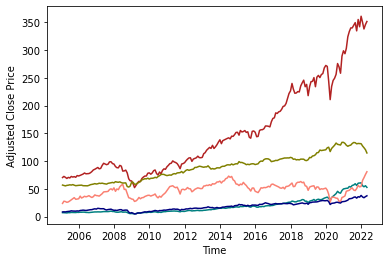

In [211]:
# 3a
etf5_data = pd.read_csv('/Users/zoeyroberts/Documents/Spring 2022/Econs 525/etf5_m_4.csv', delimiter=',')
pd.set_option('display.max_columns', None)
print(f'etf5_data.head(): \n{etf5_data.head()}\n')
print(f'etf5_data.tail(): \n{etf5_data.tail()}\n')

etf5_summary = etf5_data.describe()
print(f'etf5_summary:\n{etf5_summary}\n')

corr_coef = etf5_data.corr()
print(f'corr_coef:\n{corr_coef}\n')

T = len(etf5_data)
print(f'T: \n{T}\n')

etf5_data.index = pd.date_range(start='2005-01',periods=T,freq='M')

trend = [i + 1 for i in range(0, len(etf5_data))]
etf5_data['trend'] = np.reshape(trend, (len(trend), 1))

plt.plot('dia', data=etf5_data, color='firebrick', linestyle='-')
plt.plot('oneq',data=etf5_data, color='teal', linestyle='-')
plt.plot('xle',data=etf5_data, color='salmon', linestyle='-')
plt.plot('lqd',data=etf5_data,color='olive', linestyle='-')
plt.plot('vgsix',data=etf5_data,color='navy',linestyle='-')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Time')
plt.savefig('etf5_plot.pdf')
plt.show()

# This timeseries dataset has the notable property of containing exclusively positive correlation 
# coefficients bewteen all variables. There are 208 monthly oberservations of each variable, which
# range from January 2005 to April 2022. As of right now they are not normalized, meaning they 
# start at different first values, so it is nearly impossible to compare their respective changes 
# with one another. Additionally, the values of dia, oneq, xle, lqd, and vgsix increased over time 
# because each one has a final observation which is greater than its first. 

In [282]:
# 3b
etf5_data21 = pd.read_csv('/Users/zoeyroberts/Documents/Spring 2022/Econs 525/etf5_m_4_21.csv', delimiter=',')
pd.set_option('display.max_columns', None)
print(f'etf5_data21.head(): \n{etf5_data21.head()}\n')
print(f'etf5_data21.tail(): \n{etf5_data21.tail()}\n')

T = len(etf5_data21)
print(f'T: \n{T}\n')

etf5_data21.index = pd.date_range(start='2005-01',periods=T,freq='M')

trend = [i + 1 for i in range(0, len(etf5_data21))]
etf5_data21['trend'] = np.reshape(trend, (len(trend), 1))

etf5_data21['dia_lag1'] = etf5_data21['dia'].shift(1)
etf5_data21['oneq_lag1'] = etf5_data21['oneq'].shift(1)
etf5_data21['xle_lag1'] = etf5_data21['xle'].shift(1)
etf5_data21['lqd_lag1'] = etf5_data21['lqd'].shift(1)
etf5_data21['vgsix_lag1'] = etf5_data21['vgsix'].shift(1)

etf5_data21['dia_lag2'] = etf5_data21['dia'].shift(2)
etf5_data21['oneq_lag2'] = etf5_data21['oneq'].shift(2)
etf5_data21['xle_lag2'] = etf5_data21['xle'].shift(2)
etf5_data21['lqd_lag2'] = etf5_data21['lqd'].shift(2)
etf5_data21['vgsix_lag2'] = etf5_data21['vgsix'].shift(2)

etf5_data21['dia_lag3'] = etf5_data21['dia'].shift(3)
etf5_data21['oneq_lag3'] = etf5_data21['oneq'].shift(3)
etf5_data21['xle_lag3'] = etf5_data21['xle'].shift(3)
etf5_data21['lqd_lag3'] = etf5_data21['lqd'].shift(3)
etf5_data21['vgsix_lag3'] = etf5_data21['vgsix'].shift(3)

etf5_data21[['ddia','doneq','dxle','dlqd','dvgsix']] = etf5_data21[['dia','oneq',\
             'xle','lqd','vgsix']].diff(periods=1)

etf5_data21['ddia_lag1'] = etf5_data21['ddia'].shift(1)
etf5_data21['doneq_lag1'] = etf5_data21['doneq'].shift(1)
etf5_data21['dxle_lag1'] = etf5_data21['dxle'].shift(1)
etf5_data21['dlqd_lag1'] = etf5_data21['dlqd'].shift(1)
etf5_data21['dvgsix_lag1'] = etf5_data21['dvgsix'].shift(1)

etf5_data21['ddia_lag2'] = etf5_data21['ddia'].shift(2)
etf5_data21['doneq_lag2'] = etf5_data21['doneq'].shift(2)
etf5_data21['dxle_lag2'] = etf5_data21['dxle'].shift(2)
etf5_data21['dlqd_lag2'] = etf5_data21['dlqd'].shift(2)
etf5_data21['dvgsix_lag2'] = etf5_data21['dvgsix'].shift(2)

etf5_data21['ddia_lag3'] = etf5_data21['ddia'].shift(3)
etf5_data21['doneq_lag3'] = etf5_data21['doneq'].shift(3)
etf5_data21['dxle_lag3'] = etf5_data21['dxle'].shift(3)
etf5_data21['dlqd_lag3'] = etf5_data21['dlqd'].shift(3)
etf5_data21['dvgsix_lag3'] = etf5_data21['dvgsix'].shift(3)

print('Testing for Unit Roots: dia')
dia_reg = smf.ols(formula='ddia ~ dia_lag1 + ddia_lag1 + trend', data=etf5_data21)
dia_results = dia_reg.fit()
print(f'dia_results.summary(): \n{dia_results.summary()}\n')

dia_res_ADF = sm.tsa.stattools.adfuller(etf5_data21['dia'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
dia_ADF_stat = dia_res_ADF[0]
dia_ADF_pval = dia_res_ADF[1]
table = pd.DataFrame({'names': dia_res_ADF[3].resols.model.exog_names,
                      'b': np.round(dia_res_ADF[3].resols.params, 4),
                      'se': np.round(dia_res_ADF[3].resols.bse, 4),
                      't': np.round(dia_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(dia_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'dia_ADF_stat: {dia_ADF_stat}\n')
print(f'dia_ADF_pval: {dia_ADF_pval}\n')

print('Testing for Unit Roots: oneq')
oneq_reg = smf.ols(formula='doneq ~ oneq_lag1 + doneq_lag1 + trend', data=etf5_data21)
oneq_results = oneq_reg.fit()
print(f'oneq_results.summary(): \n{oneq_results.summary()}\n')

oneq_res_ADF = sm.tsa.stattools.adfuller(etf5_data21['oneq'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
oneq_ADF_stat = oneq_res_ADF[0]
oneq_ADF_pval = oneq_res_ADF[1]
table = pd.DataFrame({'names': oneq_res_ADF[3].resols.model.exog_names,
                      'b': np.round(oneq_res_ADF[3].resols.params, 4),
                      'se': np.round(oneq_res_ADF[3].resols.bse, 4),
                      't': np.round(oneq_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(oneq_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'oneq_ADF_stat: {oneq_ADF_stat}\n')
print(f'oneq_ADF_pval: {oneq_ADF_pval}\n')

print('Testing for Unit Roots: xle')
xle_reg = smf.ols(formula='dxle ~ xle_lag1 + dxle_lag1 + trend', data=etf5_data21)
xle_results = xle_reg.fit()
print(f'xle_results.summary(): \n{xle_results.summary()}\n')

xle_res_ADF = sm.tsa.stattools.adfuller(etf5_data21['xle'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
xle_ADF_stat = xle_res_ADF[0]
xle_ADF_pval = xle_res_ADF[1]
table = pd.DataFrame({'names': xle_res_ADF[3].resols.model.exog_names,
                      'b': np.round(xle_res_ADF[3].resols.params, 4),
                      'se': np.round(xle_res_ADF[3].resols.bse, 4),
                      't': np.round(xle_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(xle_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'xle_ADF_stat: {xle_ADF_stat}\n')
print(f'xle_ADF_pval: {xle_ADF_pval}\n')

print('Testing for Unit Roots: lqd')
lqd_reg = smf.ols(formula='dlqd ~ lqd_lag1 + dlqd_lag1 + trend', data=etf5_data21)
lqd_results = lqd_reg.fit()
print(f'lqd_results.summary(): \n{lqd_results.summary()}\n')

lqd_res_ADF = sm.tsa.stattools.adfuller(etf5_data21['lqd'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
lqd_ADF_stat = lqd_res_ADF[0]
lqd_ADF_pval = lqd_res_ADF[1]
table = pd.DataFrame({'names': lqd_res_ADF[3].resols.model.exog_names,
                      'b': np.round(lqd_res_ADF[3].resols.params, 4),
                      'se': np.round(lqd_res_ADF[3].resols.bse, 4),
                      't': np.round(lqd_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(lqd_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'lqd_ADF_stat: {lqd_ADF_stat}\n')
print(f'lqd_ADF_pval: {lqd_ADF_pval}\n')

print('Testing for Unit Roots: vgsix')
vgsix_reg = smf.ols(formula='dvgsix ~ vgsix_lag1 + dvgsix_lag1 + trend', data=etf5_data21)
vgsix_results = vgsix_reg.fit()
print(f'vgsix_results.summary(): \n{vgsix_results.summary()}\n')

vgsix_res_ADF = sm.tsa.stattools.adfuller(etf5_data21['vgsix'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
vgsix_ADF_stat = vgsix_res_ADF[0]
vgsix_ADF_pval = vgsix_res_ADF[1]
table = pd.DataFrame({'names': vgsix_res_ADF[3].resols.model.exog_names,
                      'b': np.round(vgsix_res_ADF[3].resols.params, 4),
                      'se': np.round(vgsix_res_ADF[3].resols.bse, 4),
                      't': np.round(vgsix_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(vgsix_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'vgsix_ADF_stat: {vgsix_ADF_stat}\n')
print(f'vgsix_ADF_pval: {vgsix_ADF_pval}\n')

# Once running five automated augmented Dickey-Fuller tests, the variables dia, oneq, 
# xle, lqd, and vgsix have p-values 0.97, 1.0, 0.37, 0.16, and 0.49 respectively. These
# p-values are all greater than 0.05, which means we fail to reject the null hypothesis, 
# and each process has a unit root. 

etf5_data21.head(): 
     Date        dia      oneq        xle        lqd     vgsix
0  1/1/05  70.271790  6.944605  23.649622  56.676422  8.277572
1  2/1/05  72.283997  6.910404  27.617458  55.933472  8.513385
2  3/1/05  70.621147  6.726569  27.000246  55.223633  8.282387
3  4/1/05  68.637695  6.476562  25.624104  56.109932  8.865559
4  5/1/05  70.541359  7.002084  26.338171  56.468136  9.152798

etf5_data21.tail(): 
        Date         dia       oneq        xle         lqd      vgsix
191  12/1/20  298.660980  49.703526  35.391869  133.650146  26.916330
192   1/1/21  293.388885  50.239967  37.208981  131.732803  27.336977
193   2/1/21  302.947388  50.846622  45.564915  128.497772  28.256927
194   3/1/21  323.858643  50.989601  46.426056  126.590340  29.535168
195   4/1/21  333.129547  54.029053  47.234238  127.921211  32.063362

T: 
196

Testing for Unit Roots: dia
dia_results.summary(): 
                            OLS Regression Results                            
Dep. Variable:    

In [159]:
# 3c
print('Cointegration test for dia and oneq')
oneq_dia_reg = smf.ols(formula='dia ~ oneq', data=etf5_data21)
oneq_dia_results = oneq_dia_reg.fit()
print(f'oneq_dia_results.summary(): \n{oneq_dia_results.summary()}\n')
etf5_data21['dia_h1'] = oneq_dia_results.predict()
oneq_trend_reg = smf.ols(formula='dia_h1 ~ trend + oneq', data=etf5_data21)
oneq_trend_results = oneq_trend_reg.fit()
print(f'oneq_trend_results.summary(): \n{oneq_trend_results.summary()}\n')
oneq_coint = sm.tsa.stattools.coint(etf5_data21['dia'],etf5_data21['oneq'],trend='ct',autolag='aic')
labels = ["coint_t", "pvalue", "crit_values"]
for i in range(len(labels)):
    print(labels[i], ": ", oneq_coint[i])
    
print('Cointegration test for dia and xle')
xle_dia_reg = smf.ols(formula='dia ~ xle', data=etf5_data21)
xle_dia_results = xle_dia_reg.fit()
print(f'xle_dia_results.summary(): \n{xle_dia_results.summary()}\n')
etf5_data21['dia_h1'] = xle_dia_results.predict()
xle_trend_reg = smf.ols(formula='dia_h1 ~ trend + xle', data=etf5_data21)
xle_trend_results = xle_trend_reg.fit()
print(f'xle_trend_results.summary(): \n{xle_trend_results.summary()}\n')
xle_coint = sm.tsa.stattools.coint(etf5_data21['dia'],etf5_data21['xle'],trend='ct',autolag='aic')
labels = ["coint_t", "pvalue", "crit_values"]
for i in range(len(labels)):
    print(labels[i], ": ", xle_coint[i])
    
print('Cointegration test for dia and lqd')
lqd_dia_reg = smf.ols(formula='dia ~ lqd', data=etf5_data21)
lqd_dia_results = lqd_dia_reg.fit()
print(f'lqd_dia_results.summary(): \n{lqd_dia_results.summary()}\n')
etf5_data21['dia_h1'] = lqd_dia_results.predict()
lqd_trend_reg = smf.ols(formula='dia_h1 ~ trend + lqd', data=etf5_data21)
lqd_trend_results = lqd_trend_reg.fit()
print(f'lqd_trend_results.summary(): \n{lqd_trend_results.summary()}\n')
lqd_coint = sm.tsa.stattools.coint(etf5_data21['dia'],etf5_data21['lqd'],trend='ct',autolag='aic')
labels = ["coint_t", "pvalue", "crit_values"]
for i in range(len(labels)):
    print(labels[i], ": ", lqd_coint[i])
    
print('Cointegration test for dia and xle')
vgsix_dia_reg = smf.ols(formula='dia ~ xle', data=etf5_data21)
vgsix_dia_results = vgsix_dia_reg.fit()
print(f'vgsix_dia_results.summary(): \n{vgsix_dia_results.summary()}\n')
etf5_data21['dia_h1'] = vgsix_dia_results.predict()
vgsix_trend_reg = smf.ols(formula='dia_h1 ~ trend + vgsix', data=etf5_data21)
vgsix_trend_results = vgsix_trend_reg.fit()
print(f'vgsix_trend_results.summary(): \n{vgsix_trend_results.summary()}\n')
vgsix_coint = sm.tsa.stattools.coint(etf5_data21['dia'],etf5_data21['vgsix'],trend='ct',autolag='aic')
labels = ["coint_t", "pvalue", "crit_values"]
for i in range(len(labels)):
    print(labels[i], ": ", vgsix_coint[i])
    
# Running four augmented Engle-Granger two-step cointegration tests between dia and oneq, 
# dia and xle, dia and lqd, and dia and vgsix results in respective p-values of 0.27, 0.96, 
# 0.98, and 0.90. Again, these are all greater than 0.05, so we fail to reject the null 
# hypothesis and there is no cointegration between the parameters. 

Cointegration test for dia and oneq
oneq_dia_results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    dia   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4034.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          8.94e-132
Time:                        16:36:20   Log-Likelihood:                -804.53
No. Observations:                 196   AIC:                             1613.
Df Residuals:                     194   BIC:                             1620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

T: 
208



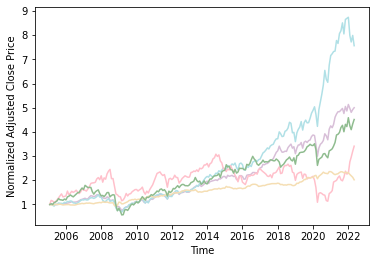

T: 
196

Testing for Unit Roots: dia
ldia_results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   ddia   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     58.33
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           9.72e-27
Time:                        11:37:01   Log-Likelihood:                 342.52
No. Observations:                 193   AIC:                            -677.0
Df Residuals:                     189   BIC:                            -664.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [212]:
# 3d
T = len(etf5_data)
print(f'T: \n{T}\n')

etf5_data_n = pd.read_csv('/Users/zoeyroberts/Documents/Spring 2022/Econs 525/etf5_m_4.csv',delimiter=',')
etf5_data_n['dia'] = etf5_data_n['dia'].to_numpy() / etf5_data_n['dia'].to_numpy()[0]
etf5_data_n['oneq'] = etf5_data_n['oneq'].to_numpy() / etf5_data_n['oneq'].to_numpy()[0]
etf5_data_n['xle'] = etf5_data_n['xle'].to_numpy() / etf5_data_n['xle'].to_numpy()[0]
etf5_data_n['lqd'] = etf5_data_n['lqd'].to_numpy() / etf5_data_n['lqd'].to_numpy()[0]
etf5_data_n['vgsix'] = etf5_data_n['vgsix'].to_numpy() / etf5_data_n['vgsix'].to_numpy()[0]

etf5_data_n.index = pd.date_range(start='2005-01',periods=T,freq='M')

plt.plot('dia', data=etf5_data_n, color='thistle', linestyle='-')
plt.plot('oneq',data=etf5_data_n, color='powderblue', linestyle='-')
plt.plot('xle',data=etf5_data_n, color='pink', linestyle='-')
plt.plot('lqd',data=etf5_data_n,color='wheat', linestyle='-')
plt.plot('vgsix',data=etf5_data_n,color='darkseagreen',linestyle='-')
plt.ylabel('Normalized Adjusted Close Price')
plt.xlabel('Time')
plt.savefig('etf5_data21_n.pdf')
plt.show()

T = len(etf5_data21)
print(f'T: \n{T}\n')

etf5s_data21 = etf5_data21[['dia','oneq','xle','lqd','vgsix']]
etf5s_data21.index = pd.date_range(start='2005-01',periods=T,freq='M')
etf5s_ld_data21 = np.log(etf5_data21[['dia','oneq','xle','lqd','vgsix']]).diff(periods=1).dropna()

trend = [i + 1 for i in range(0, len(etf5s_ld_data21))]
etf5s_ld_data21['trend'] = np.reshape(trend, (len(trend), 1))

etf5s_ld_data21['dia_lag1'] = etf5s_ld_data21['dia'].shift(1)
etf5s_ld_data21['oneq_lag1'] = etf5s_ld_data21['oneq'].shift(1)
etf5s_ld_data21['xle_lag1'] = etf5s_ld_data21['xle'].shift(1)
etf5s_ld_data21['lqd_lag1'] = etf5s_ld_data21['lqd'].shift(1)
etf5s_ld_data21['vgsix_lag1'] = etf5s_ld_data21['vgsix'].shift(1)

etf5s_ld_data21['dia_lag2'] = etf5s_ld_data21['dia'].shift(2)
etf5s_ld_data21['oneq_lag2'] = etf5s_ld_data21['oneq'].shift(2)
etf5s_ld_data21['xle_lag2'] = etf5s_ld_data21['xle'].shift(2)
etf5s_ld_data21['lqd_lag2'] = etf5s_ld_data21['lqd'].shift(2)
etf5s_ld_data21['vgsix_lag2'] = etf5s_ld_data21['vgsix'].shift(2)

etf5s_ld_data21['dia_lag3'] = etf5s_ld_data21['dia'].shift(3)
etf5s_ld_data21['oneq_lag3'] = etf5s_ld_data21['oneq'].shift(3)
etf5s_ld_data21['xle_lag3'] = etf5s_ld_data21['xle'].shift(3)
etf5s_ld_data21['lqd_lag3'] = etf5s_ld_data21['lqd'].shift(3)
etf5s_ld_data21['vgsix_lag3'] = etf5s_ld_data21['vgsix'].shift(3)

etf5s_ld_data21[['ddia','doneq','dxle','dlqd','dvgsix']] = etf5s_ld_data21[['dia','oneq',\
             'xle','lqd','vgsix']].diff(periods=1)

etf5s_ld_data21['ddia_lag1'] = etf5s_ld_data21['ddia'].shift(1)
etf5s_ld_data21['doneq_lag1'] = etf5s_ld_data21['doneq'].shift(1)
etf5s_ld_data21['dxle_lag1'] = etf5s_ld_data21['dxle'].shift(1)
etf5s_ld_data21['dlqd_lag1'] = etf5s_ld_data21['dlqd'].shift(1)
etf5s_ld_data21['dvgsix_lag1'] = etf5s_ld_data21['dvgsix'].shift(1)

etf5s_ld_data21['ddia_lag2'] = etf5s_ld_data21['ddia'].shift(2)
etf5s_ld_data21['doneq_lag2'] = etf5s_ld_data21['doneq'].shift(2)
etf5s_ld_data21['dxle_lag2'] = etf5s_ld_data21['dxle'].shift(2)
etf5s_ld_data21['dlqd_lag2'] = etf5s_ld_data21['dlqd'].shift(2)
etf5s_ld_data21['dvgsix_lag2'] = etf5s_ld_data21['dvgsix'].shift(2)

etf5s_ld_data21['ddia_lag3'] = etf5s_ld_data21['ddia'].shift(3)
etf5s_ld_data21['doneq_lag3'] = etf5s_ld_data21['doneq'].shift(3)
etf5s_ld_data21['dxle_lag3'] = etf5s_ld_data21['dxle'].shift(3)
etf5s_ld_data21['dlqd_lag3'] = etf5s_ld_data21['dlqd'].shift(3)
etf5s_ld_data21['dvgsix_lag3'] = etf5s_ld_data21['dvgsix'].shift(3)

print('Testing for Unit Roots: dia')
ldia_reg = smf.ols(formula='ddia ~ dia_lag1 + ddia_lag1 + trend', data=etf5s_ld_data21)
ldia_results = ldia_reg.fit()
print(f'ldia_results.summary(): \n{ldia_results.summary()}\n')

ldia_res_ADF = sm.tsa.stattools.adfuller(etf5s_ld_data21['dia'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
ldia_ADF_stat = ldia_res_ADF[0]
ldia_ADF_pval = ldia_res_ADF[1]
table = pd.DataFrame({'names': ldia_res_ADF[3].resols.model.exog_names,
                      'b': np.round(ldia_res_ADF[3].resols.params, 4),
                      'se': np.round(ldia_res_ADF[3].resols.bse, 4),
                      't': np.round(ldia_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(ldia_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'ldia_ADF_stat: {ldia_ADF_stat}\n')
print(f'ldia_ADF_pval: {ldia_ADF_pval}\n')

print('Testing for Unit Roots: oneq')
loneq_reg = smf.ols(formula='doneq ~ oneq_lag1 + doneq_lag1 + trend', data=etf5s_ld_data21)
loneq_results = loneq_reg.fit()
print(f'loneq_results.summary(): \n{loneq_results.summary()}\n')

loneq_res_ADF = sm.tsa.stattools.adfuller(etf5s_ld_data21['oneq'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
loneq_ADF_stat = loneq_res_ADF[0]
loneq_ADF_pval = loneq_res_ADF[1]
table = pd.DataFrame({'names': loneq_res_ADF[3].resols.model.exog_names,
                      'b': np.round(loneq_res_ADF[3].resols.params, 4),
                      'se': np.round(loneq_res_ADF[3].resols.bse, 4),
                      't': np.round(loneq_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(loneq_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'loneq_ADF_stat: {loneq_ADF_stat}\n')
print(f'loneq_ADF_pval: {loneq_ADF_pval}\n')

print('Testing for Unit Roots: xle')
lxle_reg = smf.ols(formula='dxle ~ xle_lag1 + dxle_lag1 + trend', data=etf5s_ld_data21)
lxle_results = lxle_reg.fit()
print(f'lxle_results.summary(): \n{lxle_results.summary()}\n')

lxle_res_ADF = sm.tsa.stattools.adfuller(etf5s_ld_data21['xle'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
lxle_ADF_stat = lxle_res_ADF[0]
lxle_ADF_pval = lxle_res_ADF[1]
table = pd.DataFrame({'names': lxle_res_ADF[3].resols.model.exog_names,
                      'b': np.round(lxle_res_ADF[3].resols.params, 4),
                      'se': np.round(lxle_res_ADF[3].resols.bse, 4),
                      't': np.round(lxle_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(lxle_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'lxle_ADF_stat: {lxle_ADF_stat}\n')
print(f'lxle_ADF_pval: {lxle_ADF_pval}\n')

print('Testing for Unit Roots: lqd')
llqd_reg = smf.ols(formula='dlqd ~ lqd_lag1 + dlqd_lag1 + trend', data=etf5s_ld_data21)
llqd_results = llqd_reg.fit()
print(f'lqd_results.summary(): \n{lqd_results.summary()}\n')

llqd_res_ADF = sm.tsa.stattools.adfuller(etf5s_ld_data21['lqd'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
llqd_ADF_stat = llqd_res_ADF[0]
llqd_ADF_pval = llqd_res_ADF[1]
table = pd.DataFrame({'names': llqd_res_ADF[3].resols.model.exog_names,
                      'b': np.round(llqd_res_ADF[3].resols.params, 4),
                      'se': np.round(llqd_res_ADF[3].resols.bse, 4),
                      't': np.round(llqd_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(llqd_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'llqd_ADF_stat: {llqd_ADF_stat}\n')
print(f'llqd_ADF_pval: {llqd_ADF_pval}\n')

print('Testing for Unit Roots: vgsix')
lvgsix_reg = smf.ols(formula='dvgsix ~ vgsix_lag1 + dvgsix_lag1 + trend', data=etf5s_ld_data21)
lvgsix_results = lvgsix_reg.fit()
print(f'lvgsix_results.summary(): \n{lvgsix_results.summary()}\n')

lvgsix_res_ADF = sm.tsa.stattools.adfuller(etf5s_ld_data21['vgsix'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
lvgsix_ADF_stat = lvgsix_res_ADF[0]
lvgsix_ADF_pval = lvgsix_res_ADF[1]
table = pd.DataFrame({'names': lvgsix_res_ADF[3].resols.model.exog_names,
                      'b': np.round(lvgsix_res_ADF[3].resols.params, 4),
                      'se': np.round(lvgsix_res_ADF[3].resols.bse, 4),
                      't': np.round(lvgsix_res_ADF[3].resols.tvalues, 4),
                      'pval': np.round(lvgsix_res_ADF[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'lvgsix_ADF_stat: {lvgsix_ADF_stat}\n')
print(f'lvgsix_ADF_pval: {lvgsix_ADF_pval}\n')

# Based on my response to question a, I decided to normalize and replot the data. Now
# all the variables begin at value 1, making them visually comparable. Additionally, since
# question b revealed the presence of unit roots, I log tranformed the dataset and reran 
# all five Augmented Dickey-Fuller tests. Now the p-values of dia, oneq xle, lqd, and vgsix
# are 6.90e^-17, 9.31e^-16, 3.87e^-15, 1.97e^-17, 6.11e^-18 respectively. Since all the p-values
# are now below 0.05, the variables are stationary and no longer contain unit roots, so my 
# transformation corrected my concern. In part c I concluded cointegration was not an issue, so 
# I do not need to add error-correction terms. 

In [209]:
# 3e
T = len(etf5_data21)

etf5_data21.index = pd.date_range(start='2005-01',periods=T,freq='M')

trend = [i + 1 for i in range(0, len(etf5_data21))]
etf5_data21['trend'] = np.reshape(trend, (len(trend), 1))

etf5s_data21 = etf5_data21[['dia','oneq','xle','lqd','vgsix']]
etf5s_data21.index = pd.date_range(start='2005-01',periods=T,freq='M')
etf5s_data21_ld = np.log(etf5_data21[['dia','oneq','xle','lqd','vgsix']]).diff(periods=1).dropna()

var_model = VAR(etf5s_data21_ld)
var_results = var_model.fit(4)
print(f'var_results.summary():\n{var_results.summary()}\n')

# I estimated a Vector Autoregressive model on log-differenced data that includes equations for 
# dia, oneq, xle, lqd, and vgsix, which can be seen in the results section below. 

var_results.summary():
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Apr, 2022
Time:                     02:35:57
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -31.7305
Nobs:                     191.000    HQIC:                  -32.7942
Log likelihood:           1950.92    FPE:                2.78671e-15
AIC:                     -33.5184    Det(Omega_mle):     1.65417e-15
--------------------------------------------------------------------
Results for equation dia
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.005326         0.003570            1.492           0.136
L1.dia           0.100161         0.177894            0.563           0.573
L1.oneq         -0.073759         0.132830           -0.555

In [207]:
# 3f
var_model.select_order(12)
var_results = var_model.fit(maxlags=12, ic='aic')
print(f'var_results.summary():\n{var_results.summary()}\n')

# Using the AIC criteria, the optimal lag length is six. 

var_results.summary():
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Apr, 2022
Time:                     02:23:05
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -30.8411
Nobs:                     189.000    HQIC:                  -32.4226
Log likelihood:           1979.82    FPE:                2.86932e-15
AIC:                     -33.4997    Det(Omega_mle):     1.34269e-15
--------------------------------------------------------------------
Results for equation dia
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.002764         0.003825            0.723           0.470
L1.dia           0.071001         0.188923            0.376           0.707
L1.oneq         -0.063165         0.144936           -0.436

In [236]:
# 3g
lag_order = var_results.k_ar
forecast = var_results.forecast(etf5s_data21_ld.values[-lag_order:], 12)
print(f'forecast:\n{forecast}\n')

print('12 Month returns:')
print('  dia          oneq        xle         lqd         vgsix')
print(np.sum(forecast, axis=0))

# The forecasted values for the 12 month period from 05-2021 to 04-2022 are in the matrix
# below. 

forecast:
[[-0.01876663 -0.03548848  0.00113982 -0.00377933 -0.02305887]
 [-0.01597893 -0.02225618 -0.01385661 -0.00606495 -0.03501449]
 [ 0.01882651  0.02296898  0.01939931  0.01383972  0.02325747]
 [ 0.01043773  0.00476957  0.01471103  0.00628761  0.02283268]
 [-0.00252803  0.00547359 -0.00013002 -0.00036866 -0.00255444]
 [ 0.00414315  0.00596851  0.00360591  0.00112773 -0.01364565]
 [ 0.01325368  0.01493681  0.00987479  0.0050929   0.01853727]
 [ 0.00896848  0.01273504  0.00781143  0.00437063  0.01468049]
 [ 0.00273452  0.00378655 -0.00125226  0.00117931 -0.00460327]
 [ 0.00830926  0.01112505  0.00235276  0.00458475  0.00446107]
 [ 0.01010512  0.01200275  0.00631671  0.00546738  0.01138931]
 [ 0.00636187  0.00847405  0.00208436  0.0037305   0.00653563]]

12 Month returns:
  dia          oneq        xle         lqd         vgsix
[0.04586675 0.04449625 0.05205722 0.03546759 0.0228172 ]


In [268]:
# 3h
etf5_data22 = pd.read_csv('/Users/zoeyroberts/Documents/Spring 2022/Econs 525/etf5_m_4_22.csv',delimiter=',')
y_true = np.log(etf5_data22[['dia','oneq','xle','lqd','vgsix']]).diff(periods=1).dropna()
y_pred = forecast 

forecasterror = np.subtract(y_true,y_pred).mean()
print(forecasterror)

mse = np.square(forecasterror).mean()
print('MSE:')
print(mse)

rmse = np.sqrt(forecasterror).mean()
print('RMSE:')
print(rmse)

mae_forecasterror = np.abs(np.subtract(y_true,y_pred).mean())
print(mae_forecasterror)

mae = np.mean(mae_forecasterror)
print('MAE:')
print(mae)

# The mean squared error (MSE) is 0.00038. I then performed two more test, the root mean squared
# error (RMSE) and the mean absolute error (MAE), which are 0.10994 and 0.01399 respectively. 
# The premise of the efficient market hypothesis states that because tomorrow's stock prices 
# are only based on new information, there are virtually unpredictable because the new information
# itself is also unpredictable. Therefore, while the calculated MSE, RMSE, and MAE are all relatively low, 
# I would say that the forecast is not useful since one could never "outsmart the market". 

dia      0.000628
oneq    -0.006037
xle      0.040266
lqd     -0.012172
vgsix    0.010839
dtype: float64
MSE:
0.00038476418657130594
RMSE:
0.10994284541634568
dia      0.000628
oneq     0.006037
xle      0.040266
lqd      0.012172
vgsix    0.010839
dtype: float64
MAE:
0.013988306212892088


In [100]:
# 3i
# Based on my modelling effort, I would invest my money in xle, aka energy sector SPD 
# because it is the etf with the highest calculated 12 month return as seen in parts g and h. 

In [4]:
# question 4

In [269]:
# 4a
c = woo.dataWoo('CHARITY')
c.describe()

# (i) Around 39.99%, or rounded 40%, percent of people responded most recently.

,respond,gift,resplast,weekslast,propresp,mailsyear,giftlast,avggift
count,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000
mean,0.399953,7.444470,0.334817,59.048199,0.484359,2.049555,19.748360,18.242837
std,0.489946,15.062559,0.471982,44.323741,0.253393,0.667580,154.200909,78.702864
min,0.000000,0.000000,0.000000,13.142858,0.090909,0.250000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,26.142857,0.285714,1.750000,10.000000,10.000000
50%,0.000000,0.000000,0.000000,51.285713,0.444444,2.000000,10.000000,10.000000
75%,1.000000,10.000000,1.000000,103.857140,0.666667,2.500000,25.000000,23.333334
max,1.000000,250.000000,1.000000,195.000000,1.000000,3.500000,10000.000000,5005.000000


In [271]:
# 4b
probit_reg = smf.probit(formula='respond ~ resplast + weekslast + propresp + mailsyear + \
                                 avggift', data=c)
probit_results = probit_reg.fit(disp=0)

print(f'probit_results.summary(): \n{probit_results.summary()}\n')

# (ii) Of all the explanatory variables, resplast, weekslast, propresp, and mailsyear 
# are all statistically significant.

probit_results.summary(): 
                          Probit Regression Results                           
Dep. Variable:                respond   No. Observations:                 4268
Model:                         Probit   Df Residuals:                     4262
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                  0.1727
Time:                        12:21:28   Log-Likelihood:                -2376.2
converged:                       True   LL-Null:                       -2872.3
Covariance Type:            nonrobust   LLR p-value:                2.893e-212
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2949      0.114    -11.331      0.000      -1.519      -1.071
resplast       0.1261      0.057      2.204      0.028       0.014       0.238
weekslast     -0.0046    

In [276]:
# 4c
coefficients = np.array(probit_results.model.exog_names)
coefficients = np.delete(coefficients, 0) 
probit_APE = probit_results.get_margeff().margeff
probit_APE_table = pd.DataFrame({'coefficients': coefficients,
                          'probit_APE':
np.round(probit_APE, 4)})
print(f'probit_APE_table: \n{probit_APE_table}\n')

linear_reg = smf.ols(formula='respond ~ resplast + weekslast + propresp + mailsyear + avggift', data=c)
linear_results = linear_reg.fit()
print(f'linear_results.summary(): \n{linear_results.summary()}\n')

# (iii) 
# The probit model's APE for mailsyear is 0.046, while the linear model's APE for mailsyear is 
# 0.052. 

probit_APE_table: 
  coefficients  probit_APE
0     resplast      0.0397
1    weekslast     -0.0014
2     propresp      0.5822
3    mailsyear      0.0460
4      avggift      0.0004

linear_results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                respond   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     232.7
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          3.16e-220
Time:                        12:25:07   Log-Likelihood:                -2495.4
No. Observations:                4268   AIC:                             5003.
Df Residuals:                    4262   BIC:                             5041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
 

In [277]:
# 4d
y, X = pt.dmatrices('gift ~ resplast + weekslast + propresp + mailsyear + avggift', data=c)
gift_reg = smf.ols(formula='gift ~ resplast + weekslast + propresp + mailsyear + avggift', data=c)
gift_results = gift_reg.fit()
sigma_start = np.log(sum(gift_results.resid ** 2) / len(gift_results.resid))
params_start = np.concatenate((np.array(gift_results.params), sigma_start), axis=None)
class Tobit(smclass.GenericLikelihoodModel):
    def nloglikeobs(self, params):
        X = self.exog
        y = self.endog
        p = X.shape[1]
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        y_eq = (y == 0)
        y_g = (y > 0)
        l1 = np.empty(len(y))
        l1[y_eq] = np.log(stats.norm.cdf((-y_hat)[y_eq] / sigma))
        l1[y_g] = np.log(stats.norm.pdf((y - y_hat)[y_g] / sigma)) - np.log(sigma)
        return -l1

tobit_reg = Tobit(endog=y, exog=X)
tobit_results = tobit_reg.fit(start_params=params_start, maxiter=10000, disp=0)
print(f'tobit_results.summary(): \n{tobit_results.summary()}\n')

# (iv) Now, weekslast, propresp, mailsyear, and avgift are statistically significant. This is every 
# explanatory variables execept replast.

tobit_results.summary(): 
                                Tobit Results                                 
Dep. Variable:                   gift   Log-Likelihood:                -9272.4
Model:                          Tobit   AIC:                         1.856e+04
Method:            Maximum Likelihood   BIC:                         1.859e+04
Date:                Thu, 28 Apr 2022                                         
Time:                        12:28:29                                         
No. Observations:                4268                                         
Df Residuals:                    4262                                         
Df Model:                           5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.5946      2.784    -10.271      0.000     -34.051     -23.138
resplast       1.6857     

In [281]:
# 4e
print(type(tobit_results))

p = X.shape[1]
beta = tobit_results.params[0:p]
sigma = np.exp(tobit_results.params[p])
print("SIGMA: ", sigma)
print('PARAMS: ', tobit_results.params)

variables = ['resplast','weekslast','propresp','mailsyear','avggift']
for i in range(0,4):
    c[variables[i]] = beta[i+1] * stats.norm.cdf(X @ beta / sigma)
print(f'c.head(): \n {c.head()}\n')
print(f'c.tail(): \n {c.tail()}\n')
print('means:')
print(np.mean(c[variables], axis=0))

# (v) Given that the tobit APE of mailsyear is 1.49, which is almost three times the 
# linear APE of mailsyear 0.52, no they are not similar.

<class 'statsmodels.base.model.GenericLikelihoodModelResults'>
SIGMA:  27.007203551101153
PARAMS:  [-2.85945507e+01  1.68574672e+00 -1.30715831e-01  3.51482305e+01
  4.00418178e+00  2.70525730e-02  3.29610363e+00]
c.head(): 
    respond  gift  resplast  weekslast   propresp  mailsyear  giftlast  avggift
0        0     0  0.275778  -0.021384   5.750046   0.655061        10     10.0
1        0     0  0.459884  -0.035660   9.588696   1.092370        10     10.0
2        0     0  0.651278  -0.050501  13.579301   1.546991        10     10.0
3        0     0  0.324302  -0.025147   6.761777   0.770320        10     10.0
4        1    10  0.301175  -0.023354   6.279582   0.715387        10     10.0

c.tail(): 
       respond  gift  resplast  weekslast   propresp  mailsyear  giftlast  \
4263        1    10  1.084692  -0.084109  22.616097   2.576487        10   
4264        1    25  0.805163  -0.062434  16.787854   1.912518        25   
4265        1    25  0.388695  -0.030140   8.104379   0.923

In [ ]:
# 4f
# (vi) The compatibility between the tobit and probit and linear models is questionable. 
# Even though the three models are consistent across the board when it comes to the signs 
# of coefficients, the magnitudes of said coefficients is smaller in the probit and linear 
# models than it is in the tobit model.